<a href="https://colab.research.google.com/github/KirtiNayak11/ML/blob/main/PCA_on_mnsit_dataset__handwriting_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [28]:
testData=pd.read_csv("https://raw.githubusercontent.com/sbussmann/kaggle-mnist/master/Data/test.csv")

In [29]:
trainData=pd.read_csv('https://raw.githubusercontent.com/sbussmann/kaggle-mnist/master/Data/train.csv')

Data Cleaning And Normalization

In [30]:
trainData.isna().any().any()

False

In [31]:
trainData.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [32]:
testData.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [38]:
x=trainData.iloc[:,1:]
x.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [39]:
y=trainData.iloc[:,0]
y.head()

0    1
1    0
2    1
3    4
4    0
Name: label, dtype: int64

It is mandatory before applying PCA to convert mean=0 and standard deviation =1 for each variable.

The StandardScaler is a preprocessing technique commonly used in machine learning to standardize the features of a dataset. It is part of the data normalization process and is particularly useful when working with numerical features that have different scales and units.

The main purpose of StandardScaler is to transform the data such that it has a mean of 0 and a standard deviation of 1. This standardization process is achieved by subtracting the mean of each feature and dividing by its standard deviation. The formula used for standardizing a feature is:

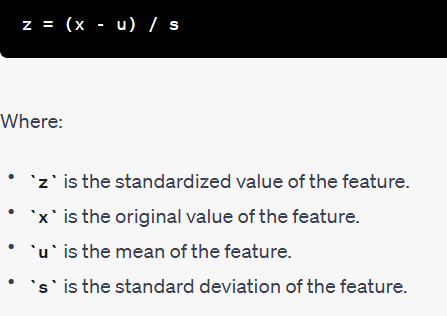

In [40]:
#class sklearn.preprocessing.StandardScaler(*, copy=True, with_mean=True, with_std=True)[source]

from sklearn.preprocessing import StandardScaler
st=StandardScaler()
data=st.fit(x) 

In [43]:
from pandas.core.groupby.base import dataclasses
#find the co-variance matrix which is : A^T * A
mnist_train_standardized = data

# matrix multiplication using numpy
covMatrix = np.matmul(x.T,x)

<ipython-input-43-4dc35dfda590>:6: FutureWarning: Calling a ufunc on non-aligned DataFrames (or DataFrame/Series combination). Currently, the indices are ignored and the result takes the index/columns of the first DataFrame. In the future , the DataFrames/Series will be aligned before applying the ufunc.
Convert one of the arguments to a NumPy array (eg 'ufunc(df1, np.asarray(df2)') to keep the current behaviour, or align manually (eg 'df1, df2 = df1.align(df2)') before passing to the ufunc to obtain the future behaviour and silence this warning.
  covMatrix = np.matmul(x.T,x)


In [45]:
print ( "The shape of variance matrix = ", covMatrix.shape)

The shape of variance matrix =  (784, 784)


#finding the top two eigen-values and corresponding eigen-vectors 

In [46]:
# the parameter 'eigvals' is defined (low value to heigh value) 
# eigh function will return the eigen values in asending order
# this code generates only the top 2 (782 and 783)(index) eigenvalues.


from scipy.linalg import eigh

values,vectors=eigh(covMatrix,eigvals=(782,783))

<ipython-input-46-396bc2e156f7>:8: DeprecationWarning: Keyword argument 'eigvals' is deprecated in favour of 'subset_by_index' keyword instead and will be removed in SciPy 1.12.0.
  values,vectors=eigh(covMatrix,eigvals=(782,783))


In [51]:
print("Shape of eigen vectors = ",vectors.shape)

Shape of eigen vectors =  (784, 2)


In [52]:
vectors = vectors.T

print("Updated shape of eigen vectors = ",vectors.shape)
# here the vectors[1] represent the eigen vector corresponding 1st principal eigen vector
# here the vectors[0] represent the eigen vector corresponding 2nd principal eigen vector

Updated shape of eigen vectors =  (2, 784)


# projecting the original data sample on the plane 
#formed by two principal eigen vectors by vector-vector multiplication.

In [57]:
import matplotlib.pyplot as plt
new_coordinates = np.matmul(vectors, x.T)

print (" resultanat new data points' shape ", vectors.shape, "X", x.T.shape," = ", new_coordinates.shape)

 resultanat new data points' shape  (2, 784) X (784, 42000)  =  (2, 42000)


In [66]:
import pandas as pd

new_coordinates=np.vstack((new_coordinates,y)).T
df=pd.DataFrame(data=new_coordinates)
df.head()

,0,1,2,3,4,5,6
0,496.627364,939.781482,1.0,1.0,1.0,1.0,1.0
1,-1591.724437,2219.158271,0.0,0.0,0.0,0.0,0.0
2,670.741316,928.988860,1.0,1.0,1.0,1.0,1.0
3,-275.255445,707.195978,4.0,4.0,4.0,4.0,4.0
4,-1804.407765,2327.202031,0.0,0.0,0.0,0.0,0.0


In [ ]:
#import seaborn as sn
#sn.FacetGrid(df).map(plt.scatter,0,1,2,3,4,5,6).add_legend()
#plt.show()

#Testing the data

In [91]:
def mnist_train(return_models):
    models = return_models
    for model in models:
        print("Checking for " + str(model.__class__.__name__))
    
        result_digit = model.predict(np.array(mnist_train).reshape(1, -1))
        check.equal(result_digit)
        print(result_digit)

<Axes: >

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


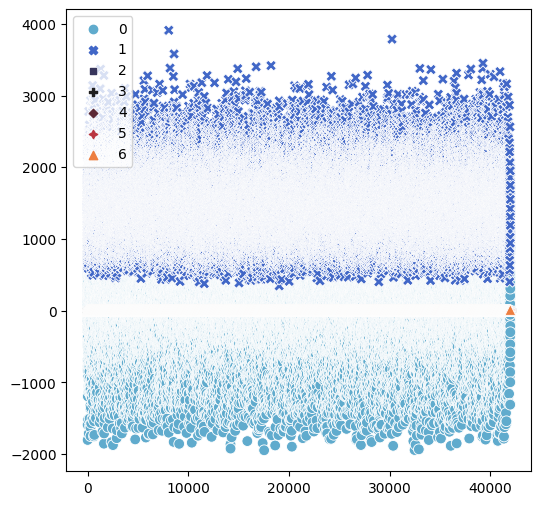

In [95]:
import seaborn as sb
import matplotlib.pyplot as plt
 
plt.figure(figsize = (6,6))
sb.scatterplot(data = df  , s = 60 , palette= 'icefire')

In [ ]:
#import seaborn as sb
#import matplotlib.pyplot as plt
 
#plt.figure(figsize = (6,6))
#sb.scatterplot(data = principal_df , x = 'PC1',y = 'PC2' , hue = 'target' , s = 60 , palette= 'icefire')

#Testing the model

In [ ]:
def mnist_train(return_models):
    models = return_models
    for model in models:
        print("Checking for " + str(model.__class__.__name__))
    
        result_digit = model.predict(np.array(mnist_train).reshape(1, -1))
        check.equal(result_digit)
        print(result_digit)